repo & folder name: GreenhouseData
Requirements imported!
Inventories imported!
current figure and save dpi = 160; current single fig size = (8, 4)


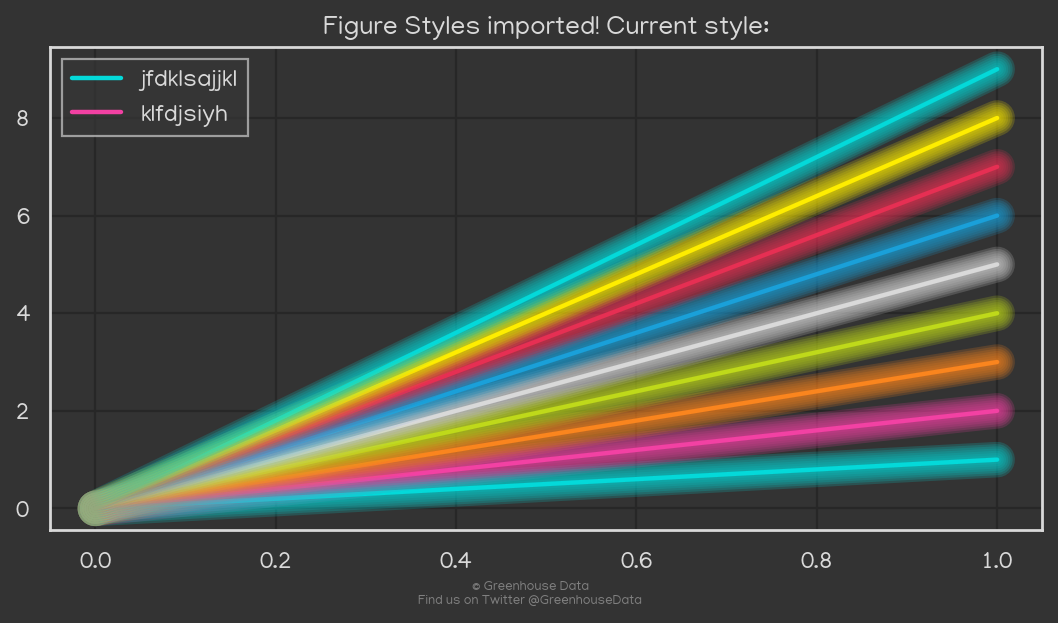

styles imported!
Imported COUNTRY_DICT & CODE_GENERATOR_ISO3
fig_country_saver imported!


In [16]:
%run ../scripts/Requirements.ipynb
%run ../scripts/Inventory_Importer.ipynb
%run ../scripts/Figure_Styles.ipynb
%run ../scripts/Country_ISO_Codes.ipynb
%run ../scripts/Figure_Saver.ipynb

In [17]:
# Supplemental metrics
df_supp = pd.read_csv("../supplemental/country_supplemental_metrics.csv", index_col=0)

In [18]:
# Country Dictionaries
STANDARD_COUNTRY_DICT = json.load(open("../supplemental/STANDARD_COUNTRY_DICT_ISO3.json", "r"))
COUNTRY_DICT = json.load(open("../supplemental/STANDARD_COUNTRY_DICT_ISO3.json", "r"))

# GLOBAL - Single Inventory

### cdiac

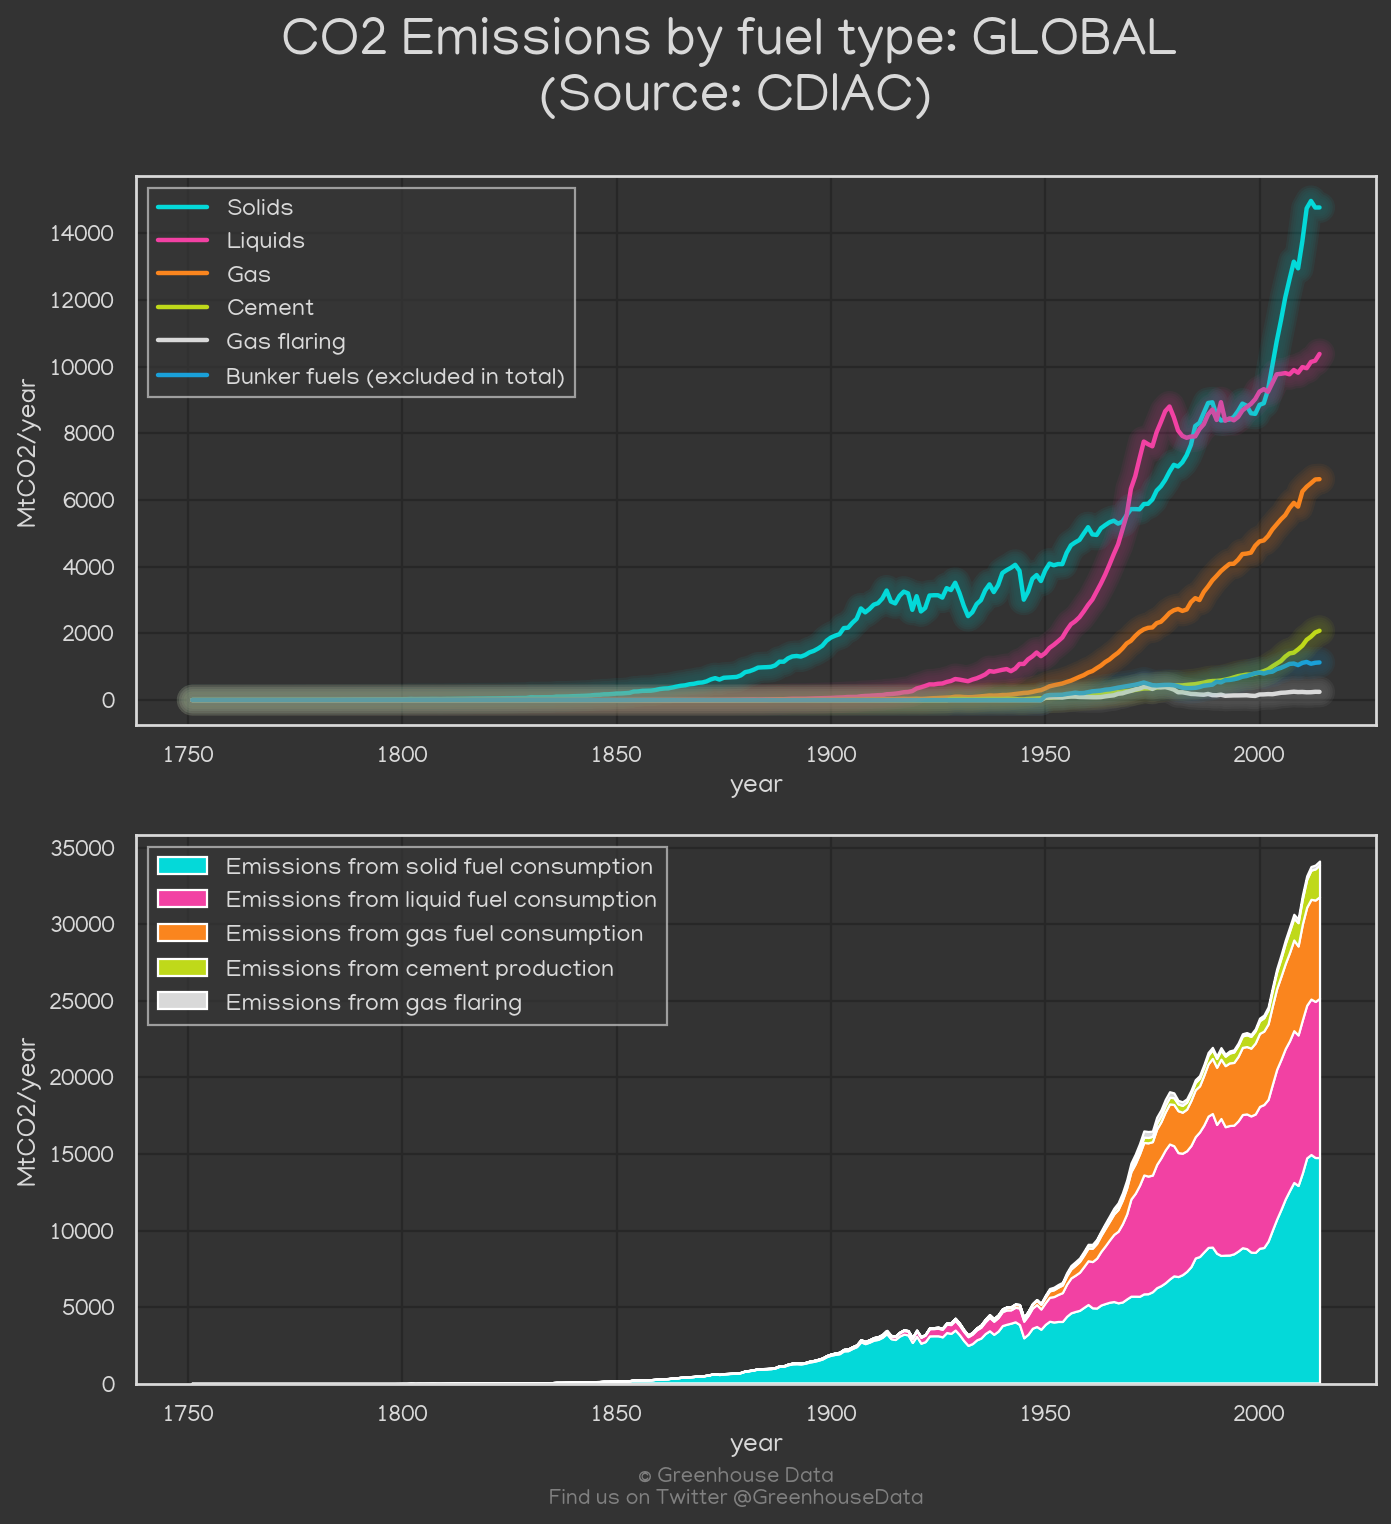

In [20]:
#----------------------------------------------------------------------------------

def plot_cdiac_totals(close=False):
    fig, axs = plt.subplots(2,1, figsize = (10,10))
    axs=axs.flatten()
    fig.suptitle("CO2 Emissions by fuel type: GLOBAL \n(Source: CDIAC)",
                 fontsize=24)
    
    df = df_cdiac.groupby("Year").sum().drop(["Total CO2 emissions from fossil-fuels and cement production (MtCO2)",
                                              "Per capita CO2 emissions (tCO2)"], axis=1)

    x = df.index
    y2 = df["Emissions from solid fuel consumption"]
    y3 = df["Emissions from liquid fuel consumption"]
    y4 = df["Emissions from gas fuel consumption"]
    y5 = df["Emissions from cement production"]
    y6 = df["Emissions from gas flaring"]
    y7 = df["Emissions from bunker fuels (not included in the totals)"]

    # ABOVE
    axs[0].plot(x,y2, label="Solids", )
    axs[0].plot(x,y3, label="Liquids")
    axs[0].plot(x,y4, label="Gas")
    axs[0].plot(x,y5, label="Cement")
    axs[0].plot(x,y6, label="Gas flaring")
    axs[0].plot(x,y7, label="Bunker fuels (excluded in total)")
    
    axs[0].set_ylabel("MtCO2/year")
    axs[0].set_xlabel("year")
    axs[0].legend(loc="upper left")
    
    
    #BELOW
    df = df.loc[:,"Emissions from solid fuel consumption":"Emissions from gas flaring"]
    df_cdiac_pos = df[df >= 0].fillna(0) #only positive values
    df_cdiac_neg = df[df < 0].fillna(0) #only (few) negative values
    axs[1].stackplot(df_cdiac_pos.index, df_cdiac_pos["Emissions from solid fuel consumption"], df_cdiac_pos["Emissions from liquid fuel consumption"], df_cdiac_pos["Emissions from gas fuel consumption"], df_cdiac_pos["Emissions from cement production"], df_cdiac_pos["Emissions from gas flaring"])
    axs[1].stackplot(df_cdiac_neg.index, df_cdiac_neg["Emissions from solid fuel consumption"], df_cdiac_neg["Emissions from liquid fuel consumption"], df_cdiac_neg["Emissions from gas fuel consumption"], df_cdiac_neg["Emissions from cement production"], df_cdiac_neg["Emissions from gas flaring"])

    axs[1].set_ylabel("MtCO2/year")
    axs[1].set_xlabel("year")    
    axs[1].legend(df.columns, loc="upper left")
    
    add_GreenhouseData_trademark(fig, y=.05, fontsize=10)
    
    NEONIZE(axs[0],7)
    
    fig.savefig("../global/CDIAC_totals1")
    
    if close == True:
        plt.close()


#----------------------------------------------------------------------------------

plot_cdiac_totals()

### fao

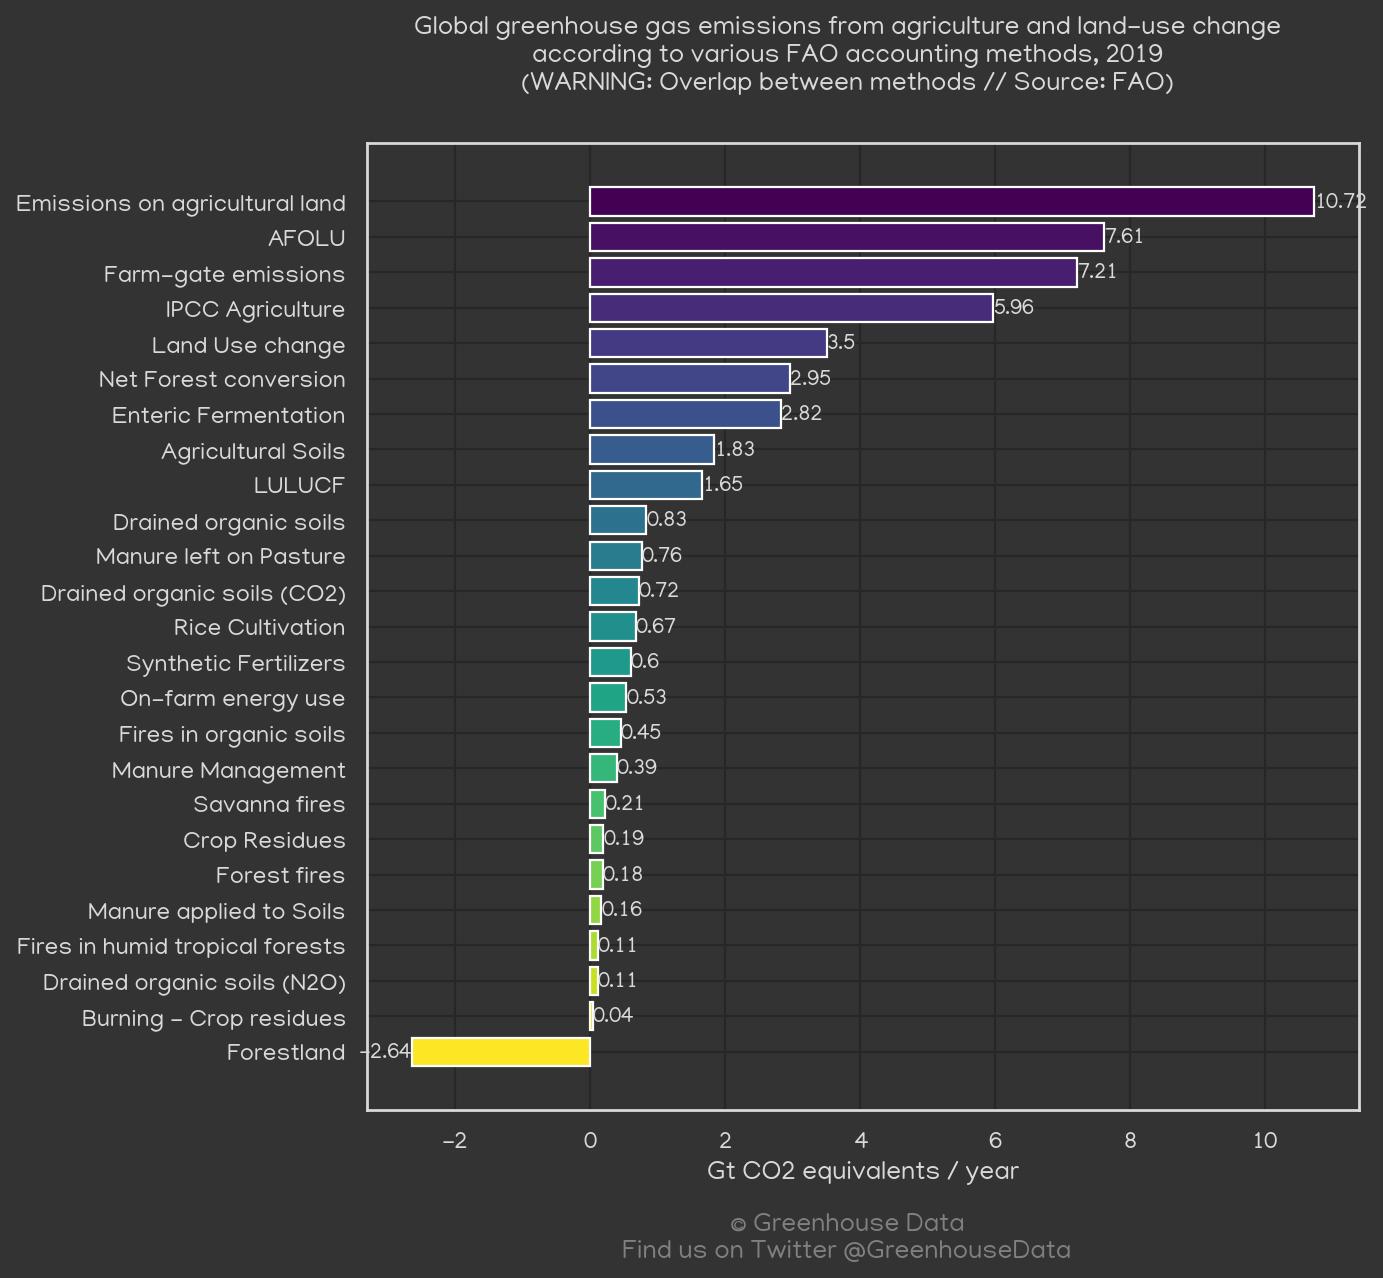

In [5]:
df_fao_global = pd.read_csv("../clean_data/global_subsets/FAO_global.csv", index_col=0)

df = df_fao_global[["Item","Element","Source", "2019","Unit"]]
df = df[df.Source=="FAO TIER 1"]
df = df[df.Element=="Emissions (CO2eq) (AR5)"]
df = df.set_index("Item")
df = df.sort_values("2019")
# display(df)

fig, axs = plt.subplots(1,1, figsize=(8,8))

fig.suptitle("Global greenhouse gas emissions from agriculture and land-use change\naccording to various FAO accounting methods, 2019\n(WARNING: Overlap between methods // Source: FAO)")
bars = axs.barh(df.index, (df["2019"]/1000000).round(2), color=plt.get_cmap("viridis_r", len(df))(range(len(df))))
axs.bar_label(bars)
axs.set_xlabel("Gt CO2 equivalents / year")

add_GreenhouseData_trademark(fig, fontsize=12)

fig.savefig("../global/FAO_1", bbox_inches="tight")

### edgar

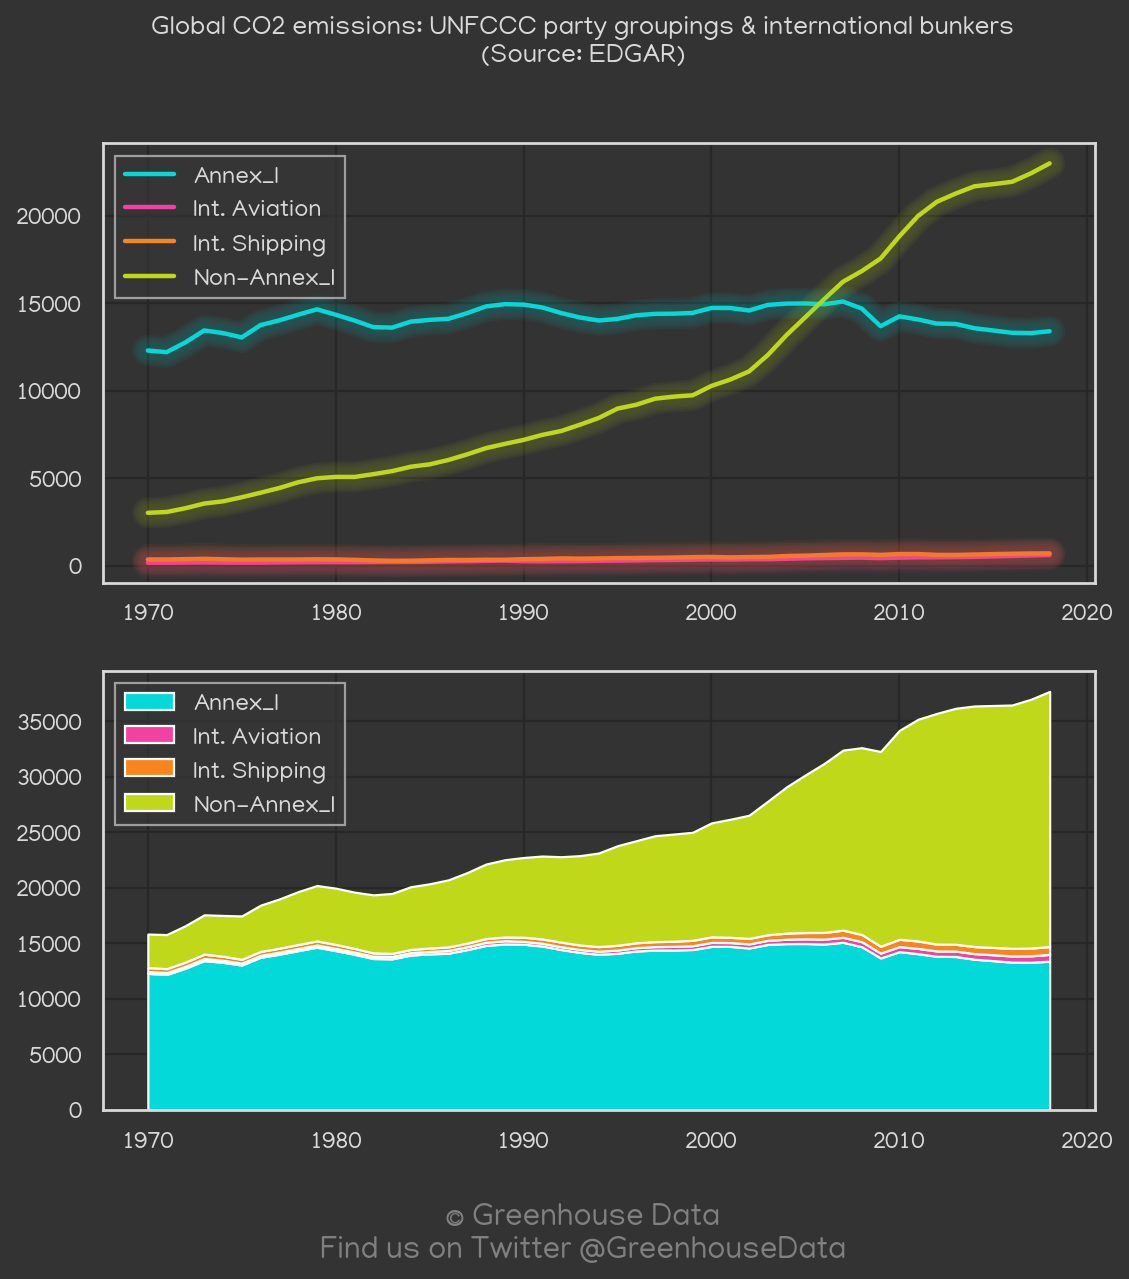

In [7]:
df_edgar_global = pd.read_csv("../clean_data/global_subsets/EDGAR_global.csv", index_col=0)

df = df_edgar_global[df_edgar_global.gas=="CO2 (fossil)"]
df = df.groupby("IPCC_annex").sum()
df = df.T
df.index = pd.to_datetime(df.index)

# ----------------------------------------------------------------------------

fig, axs = plt.subplots(2,1, figsize=(8,8))
axs = axs.flatten()

fig.suptitle("Global CO2 emissions: UNFCCC party groupings & international bunkers\n(Source: EDGAR)")

axs[0].plot(df, label=df.columns)
axs[0].legend()

axs[1].stackplot(df.index,
                 df[df.columns[0]],
                 df[df.columns[1]],
                 df[df.columns[2]],
                 df[df.columns[3]],
                )

axs[1].legend(df.columns, loc="upper left")

NEONIZE(axs[0],7)

fig.savefig("../global/EDGAR_1", bbox_inches="tight")

add_GreenhouseData_trademark(fig, fontsize=14)

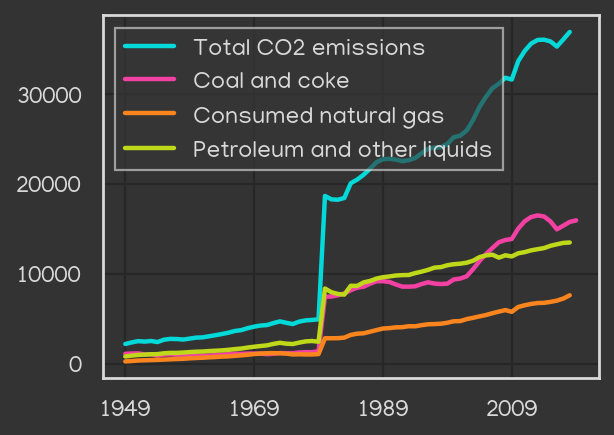

In [7]:
df_eia_global.loc[:,"1949":].T.plot()

plt.legend(df_eia_global.fuel.unique())

# Global - Multiple Inventories

In [8]:
# Global CO2 totals by inventory

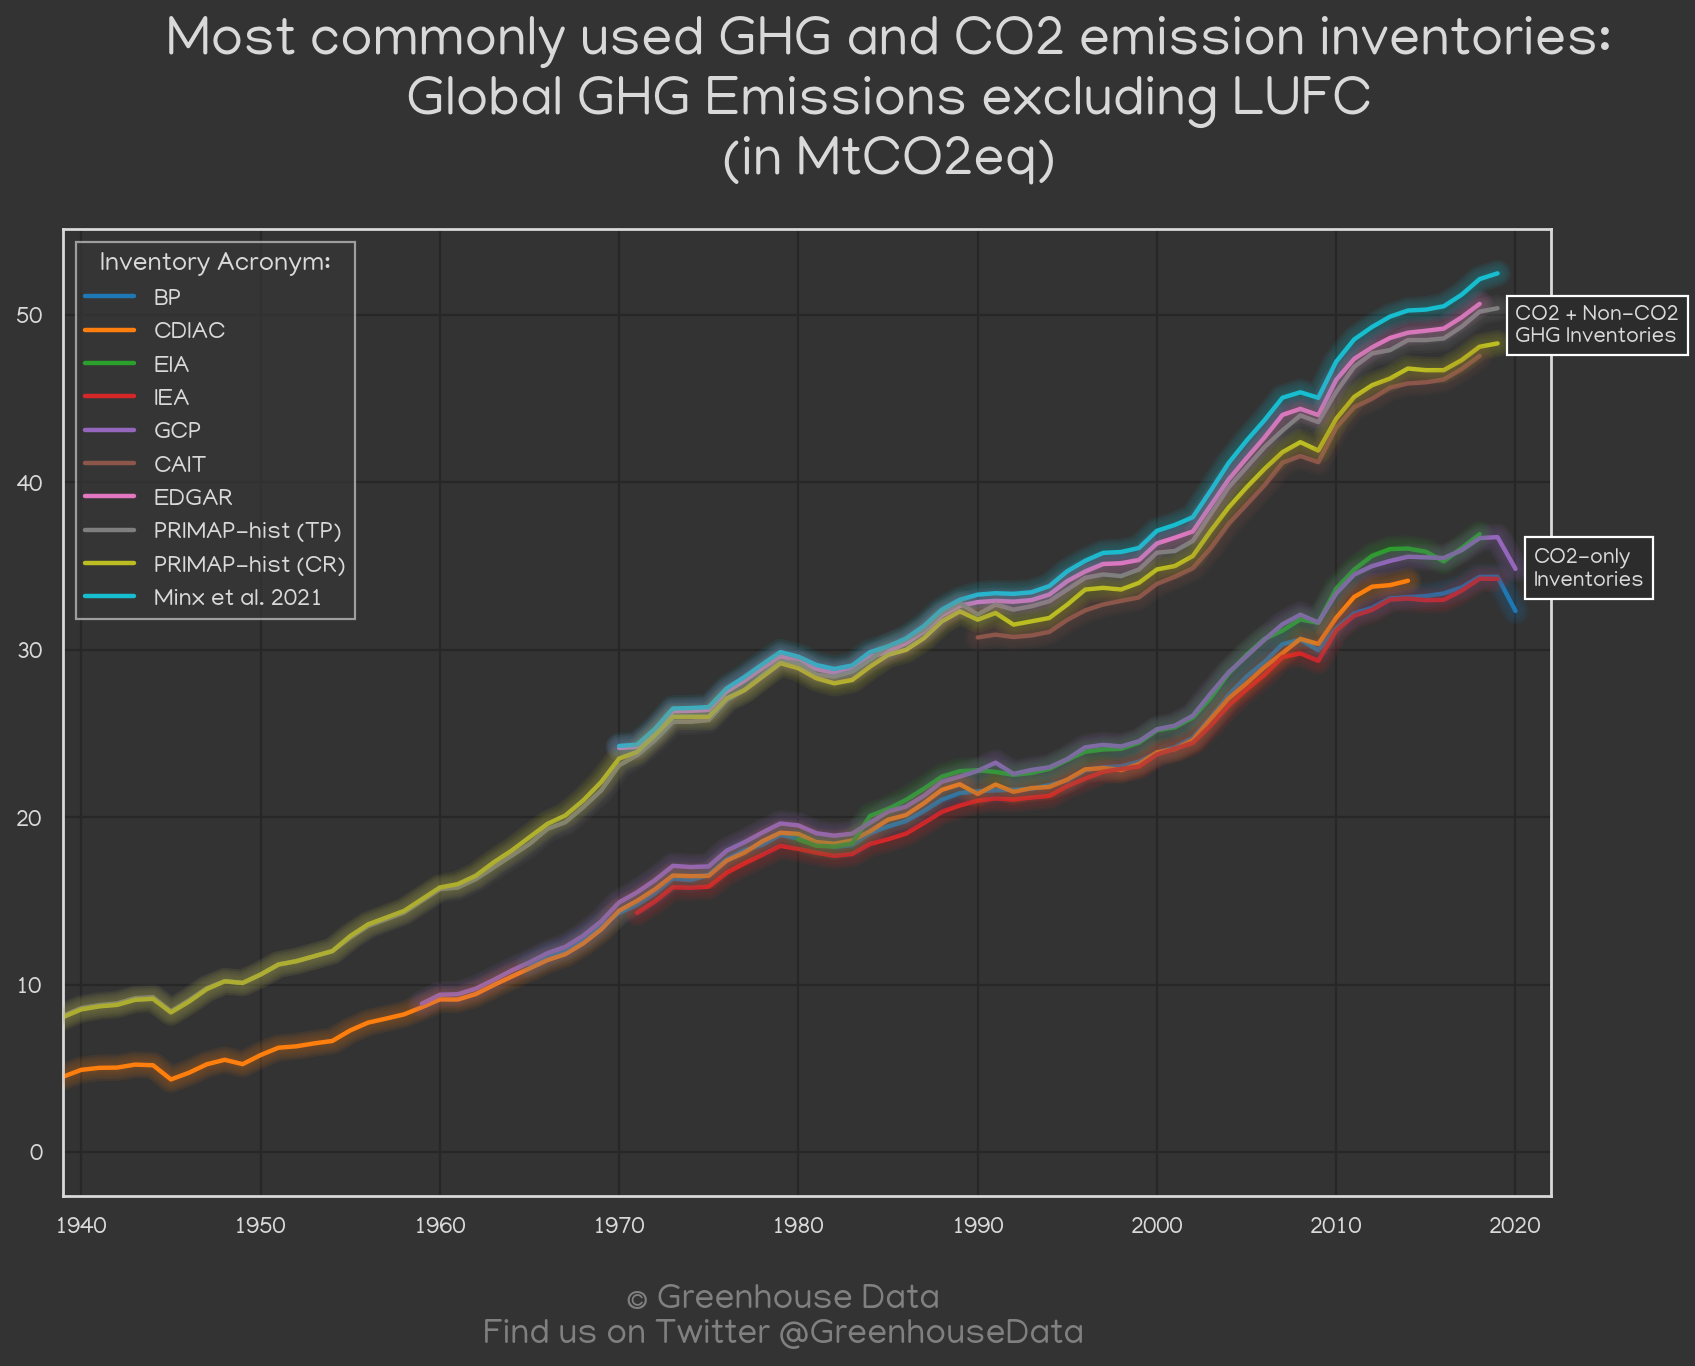

In [15]:
bp = df_bp_global.loc["1965":].squeeze().astype(float)/ 1000
cdiac = df_cdiac_global.set_index("Year").loc[:,"Total CO2 emissions from fossil-fuels and cement production (MtCO2)"] / 1000
eia = df_eia_global.loc[df_eia_global.fuel=="Total CO2 emissions",:].set_index("fuel").squeeze()["1980":] / 1000
iea = df_iea_global.loc[df_iea_global.type=="total_fuel_combustion"].set_index("type").squeeze()["1971":] / 1000
gcp = df_gcp_global.squeeze().loc["1959":] / 1000
gcp_cons = df_gcp_cons_global.squeeze().loc["1959":] / 1000

# cait
df_cait_global_yes_lucf = df_cait_global[(df_cait_global.Sector == "Total including LUCF") & (df_cait_global.Gas=="All GHG")].squeeze()["1990":] / 1000
df_cait_global_no_lucf = df_cait_global[(df_cait_global.Sector == "Total excluding LUCF") & (df_cait_global.Gas=="All GHG")].squeeze()["1990":] / 1000

# edgar
edgar = df_edgar_global.sum() 
edgar = edgar.loc["1970":]/ 1000
# display(edgar)

# primap
primap_global_histtp = df_primap_global[(df_primap_global["scenario (PRIMAP-hist)"]=="HISTTP") & 
                                           (df_primap_global["category (IPCC2006_PRIMAP)"]=="M.0.EL") &
                                           (df_primap_global["entity"]=="KYOTOGHG (AR4GWP100)")
                                          ].squeeze()["1750":] / 1000000
primap_global_histcr = df_primap_global[(df_primap_global["scenario (PRIMAP-hist)"]=="HISTCR") & 
                                           (df_primap_global["category (IPCC2006_PRIMAP)"]=="M.0.EL") &
                                           (df_primap_global["entity"]=="KYOTOGHG (AR4GWP100)")
                                          ].squeeze()["1750":] / 1000000

#minx
minx = df_minx_global.groupby(["year"]).sum().value_ar6.loc[1970:2019]/1000000000





# all dfs
list_global_emissions = [(bp,'BP'), 
                         (cdiac, "CDIAC"),
                         (eia, "EIA"),
                         (iea,"IEA"),
                         (gcp, "GCP"),
                         # (gcp_cons, "GCP (consumption-based)"),
                         # (df_cait_global_yes_lucf, "CAIT incl lucf"),
                         (df_cait_global_no_lucf, "CAIT"),
                         (edgar, "EDGAR"), 
                         (primap_global_histtp, "PRIMAP-hist (TP)"), 
                         (primap_global_histcr, "PRIMAP-hist (CR)"), 
                         (minx, "Minx et al. 2021")]

#convert all years to integers/datetime
for i, j in enumerate(list_global_emissions): 
    j[0].index = pd.to_datetime(j[0].index, format = "%Y")

# display(cdiac)
# -------------------------------------------------------------------------------------------------------------------------------------------------------

def plot_global_totals1(xmin=None, xmax=None, yscale = "linear"):
    fig, axs = plt.subplots(1,1, figsize=(12,8))
    fig.suptitle("Most commonly used GHG and CO2 emission inventories:\nGlobal GHG Emissions excluding LUFC\n(in MtCO2eq)", 
                 fontsize=25,y=1.047, x=.555)

    for i in range(len(list_global_emissions)):
        axs.plot(list_global_emissions[i][0].index,
                 # pd.to_datetime(list_global_emissions[i][0].index, format = "%Y"), 
                 list_global_emissions[i][0], 
                 label = list_global_emissions[i][1])
        
        axs.lines[i].set_color(plt.get_cmap("tab10",len(list_global_emissions))(i))
        
    axs.annotate(text ="CO2-only\nInventories", 
                 xy=(gcp.index[-1] + timedelta(days= 1 * 365),gcp[-1]-1),
                 bbox={"facecolor":"#2c2c2c"})
    
    axs.annotate(text ="CO2 + Non-CO2\nGHG Inventories", 
                 xy=(primap_global_histcr.index[-1] + timedelta(days= 1 * 365),primap_global_histtp[-1]-2),
                 bbox={"facecolor":"#2c2c2c"})

    axs.set_xlim(xmin, xmax)
    axs.set_yscale(yscale)
    axs.legend(title="Inventory Acronym:")

    NEONIZE(axs,6,97)

    add_GreenhouseData_trademark(fig, fontsize=16)
    
    fig.savefig("../global/ghg_and_co2_totals.png", bbox_inches="tight")
    
    
#### ----------------------------------- last one gets saved

# plot_global_totals1(None, datetime.datetime(2022, 1,1), yscale="linear")

plot_global_totals1(datetime.datetime(1939, 1,1), datetime.datetime(2022, 1,1))

# plot_global_totals1(datetime.datetime(1990, 1,1), datetime.datetime(2022, 1,1))

# MULTI-COUNTRY

GCP - Consumption:Production Ratio

In [10]:
df_cons_div_prod = pd.DataFrame()
df_cons_div_prod["prod"] = df_gcp.set_index("code")["2019"]
df_cons_div_prod["cons"] = df_gcp_cons.set_index("code")["2019"]
df_cons_div_prod = df_cons_div_prod.dropna(how="any")
df_cons_div_prod = df_cons_div_prod[df_cons_div_prod.index.notnull()]
df_cons_div_prod["div"] = df_cons_div_prod["cons"] / df_cons_div_prod["prod"]
df_cons_div_prod

df_sup_chosen = df_supp[["iso_code","year","population","gdp"]]
df_gcp_both = df_cons_div_prod.merge(df_sup_chosen[df_sup_chosen.year==2018], left_on="code", right_on="iso_code")
df_gcp_both = df_gcp_both.rename(columns={"iso_code":"code"}) 

df_gcp_both["prod/pc"] = df_gcp_both["prod"]/df_gcp_both.population
df_gcp_both["cons/pc"] = df_gcp_both["cons"]/df_gcp_both.population

df_gcp_both["name"] = np.nan
for i,j in enumerate(df_gcp_both.code):
    df_gcp_both.loc[i,"name"] = STANDARD_COUNTRY_DICT[j]
df_gcp_both

,prod,cons,div,code,year,population,gdp,prod/pc,cons/pc,name
0,4.866990,5.855507,1.203106,ALB,2018,2882735.0,3.400911e+10,1.688324e-06,2.031233e-06,Albania
1,167.687542,166.720377,0.994232,ARG,2018,44361150.0,8.293733e+11,3.780054e-06,3.758252e-06,Argentina
2,5.532779,5.475768,0.989696,ARM,2018,2951741.0,3.329652e+10,1.874412e-06,1.855098e-06,Armenia
3,414.818519,375.730465,0.905771,AUS,2018,24898153.0,1.238560e+12,1.666061e-05,1.509070e-05,Australia
4,68.011879,91.687836,1.348115,AUT,2018,8891383.0,3.822694e+11,7.649190e-06,1.031199e-05,Austria
...,...,...,...,...,...,...,...,...,...,...
114,6.588777,11.611881,1.762373,URY,2018,3449290.0,6.856071e+10,1.910184e-06,3.366455e-06,Uruguay
115,99.247503,120.632275,1.215469,VEN,2018,28887117.0,3.094130e+11,3.435701e-06,4.175989e-06,Venezuela
116,260.501548,233.446324,0.896142,VNM,2018,95545959.0,6.614884e+11,2.726453e-06,2.443288e-06,Vietnam
117,7.052336,10.025021,1.421518,ZMB,2018,17351714.0,6.097862e+10,4.064346e-07,5.777539e-07,Zambia


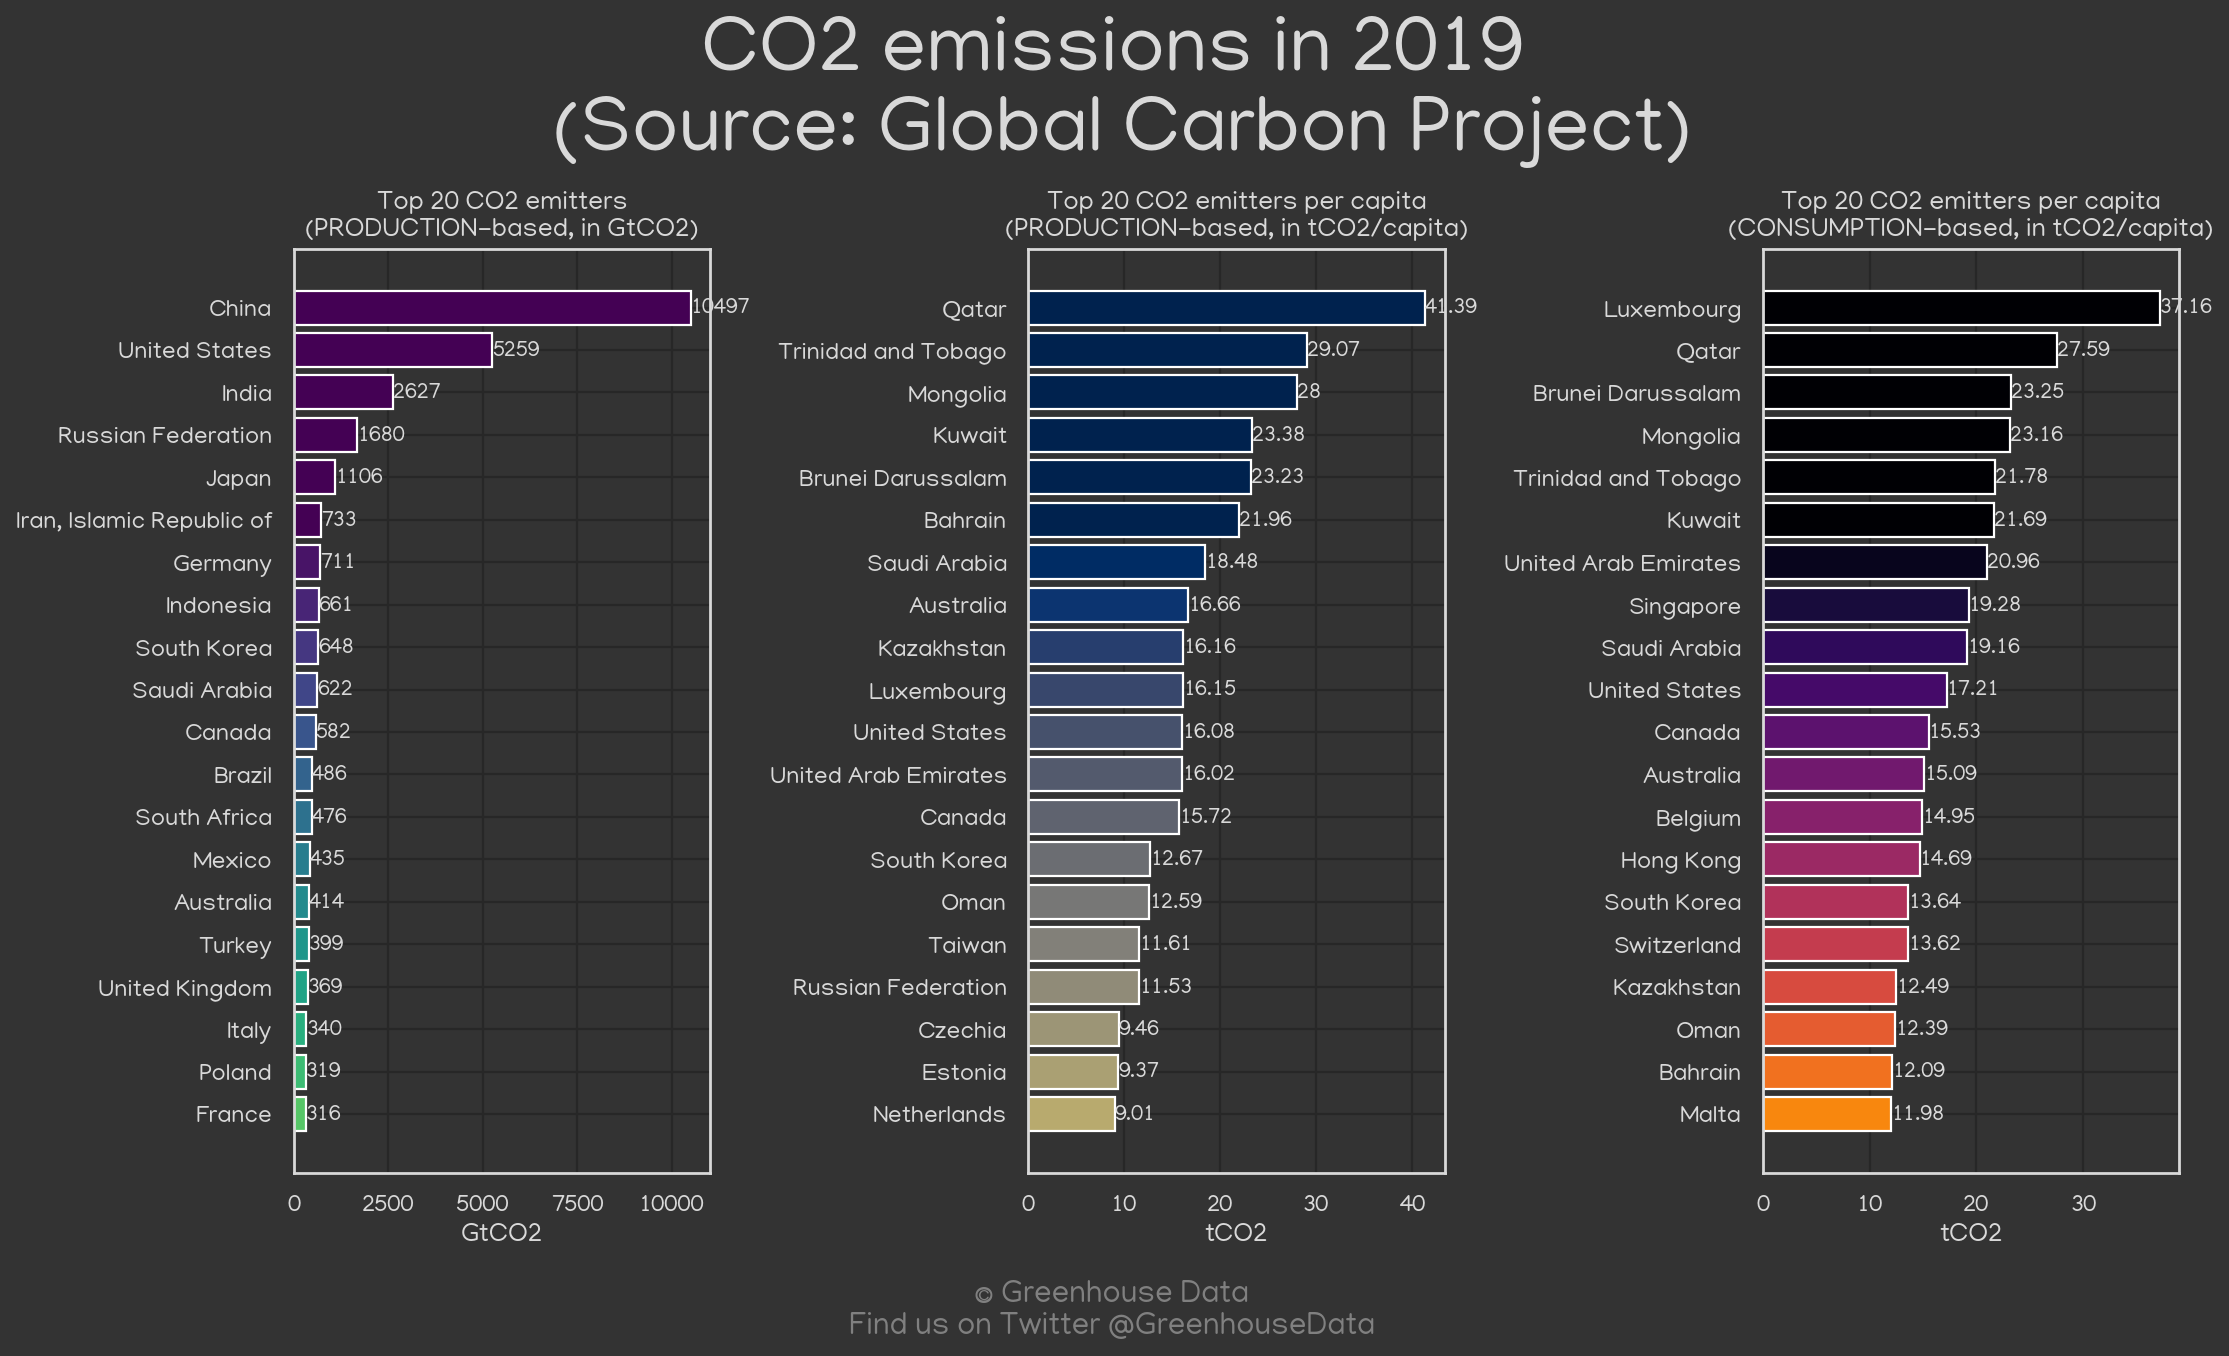

In [11]:
fig, axs = plt.subplots(1,3, figsize=(14,8))
fig.suptitle("CO2 emissions in 2019\n (Source: Global Carbon Project)", fontsize=36)

df = df_gcp_both
df = df.sort_values("prod", ascending=False)
ax0 = axs[0]
ax0.set_title("Top 20 CO2 emitters\n(PRODUCTION-based, in GtCO2)")
bar0 = ax0.barh(df.name[:20][::-1],(df["prod"][:20][::-1]).astype(int),
                color=plt.get_cmap("viridis_r", 20)(range(5,30)))
ax0.bar_label(bar0)
ax0.set_xlabel("GtCO2")

df = df_gcp_both
df = df.sort_values("prod/pc", ascending=False)
ax1 = axs[1]
ax1.set_title("Top 20 CO2 emitters per capita\n(PRODUCTION-based, in tCO2/capita)")
bar1 = ax1.barh(df.name[:20][::-1],(df["prod/pc"][:20][::-1]*1000000).round(2),
                color=plt.get_cmap("cividis_r", 20)(range(5,30)))
ax1.bar_label(bar1)
ax1.set_xlabel("tCO2")


df = df_gcp_both
df = df.sort_values("cons/pc", ascending=False)
ax2 = axs[2]
ax2.set_title("Top 20 CO2 emitters per capita\n(CONSUMPTION-based, in tCO2/capita)")
bar2 = ax2.barh(df.name[:20][::-1], (df["cons/pc"][:20][::-1]*1000000).round(2),
                color=plt.get_cmap("inferno_r", 20)(range(5,30)))
ax2.bar_label(bar2)
ax2.set_xlabel("tCO2")


add_GreenhouseData_trademark(fig, fontsize=14, y=-.05)
fig.tight_layout()    
fig.savefig("../global/GCP_top20", bbox_inches="tight")


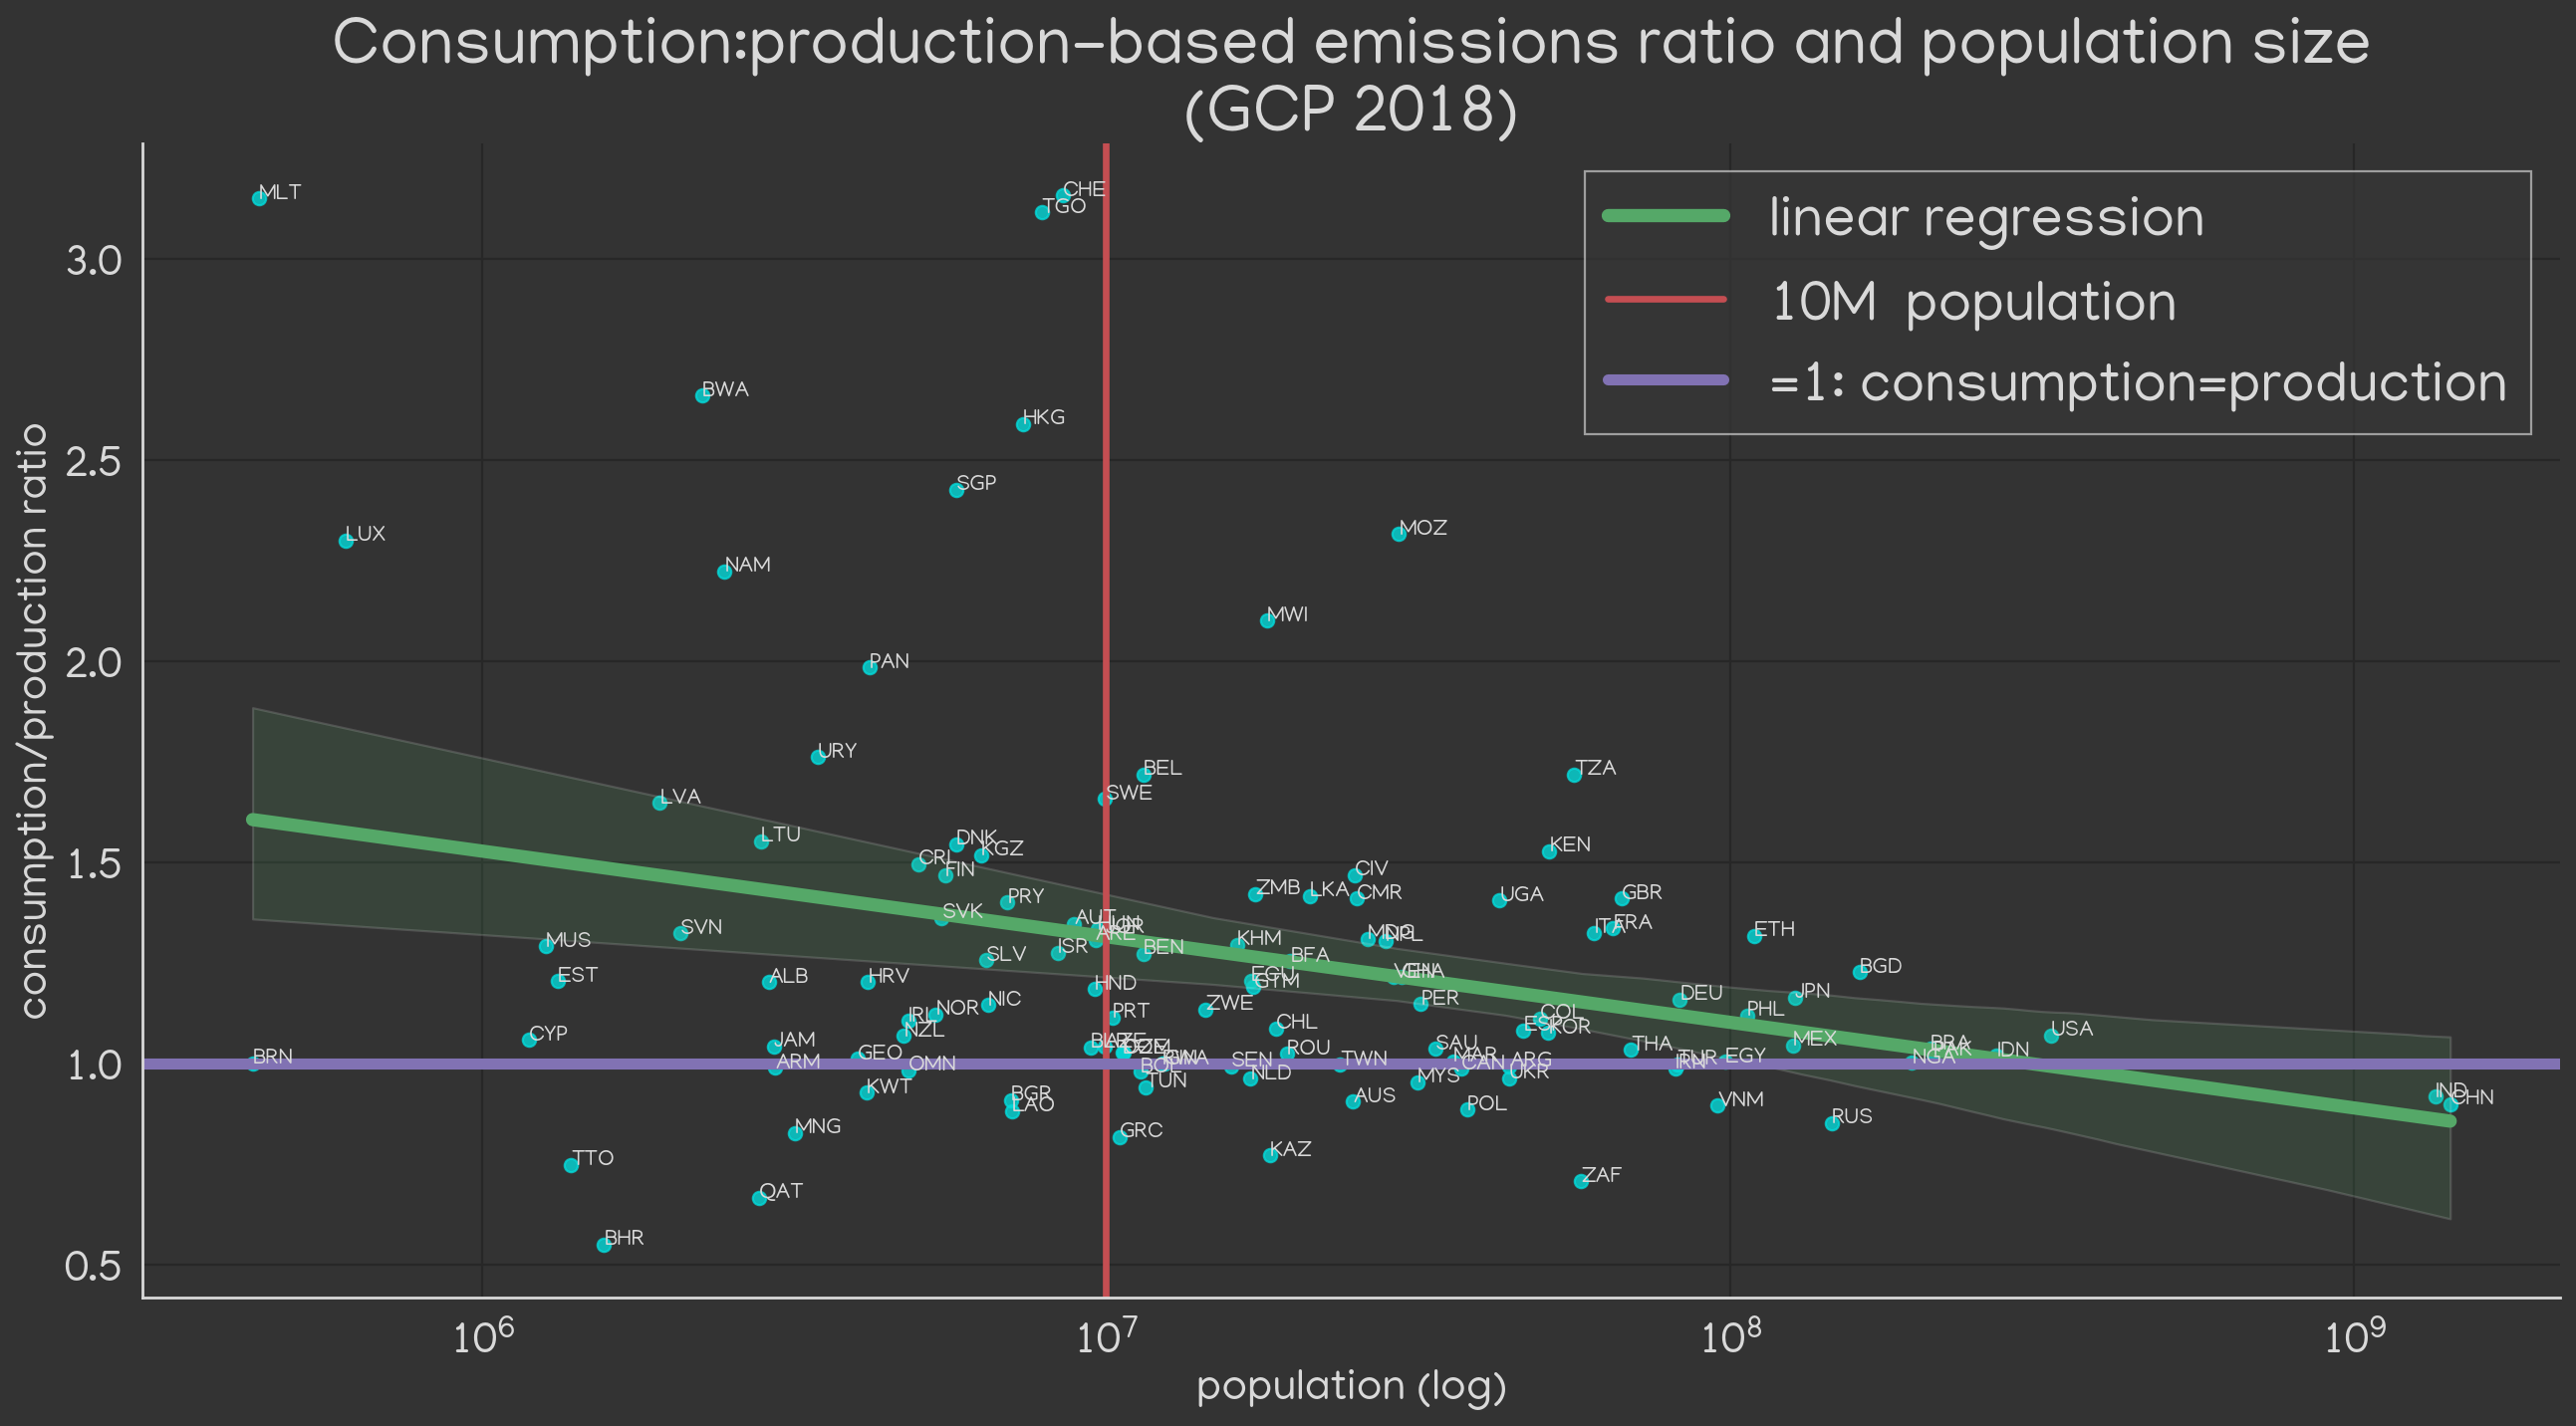

In [12]:
df_cons_div_prod = pd.DataFrame()
df_cons_div_prod["prod"] = df_gcp.set_index("code")["2019"]
df_cons_div_prod["cons"] = df_gcp_cons.set_index("code")["2019"]
df_cons_div_prod = df_cons_div_prod.dropna(how="any")
df_cons_div_prod = df_cons_div_prod[df_cons_div_prod.index.notnull()]
df_cons_div_prod["div"] = df_cons_div_prod["cons"] / df_cons_div_prod["prod"]
df_cons_div_prod

df_sup_chosen = df_supp[["iso_code","year","population","gdp"]]
df = df_cons_div_prod.merge(df_sup_chosen[df_sup_chosen.year==2018], left_on="code", right_on="iso_code")
# display(df)

# df_filter = df[df.population<100000000]
df_filter = df

# -----------------------------------------------------------------------------------------------------------

x = "population"
y="div"
g = sns.lmplot(data=df_filter, 
               x="population", y = "div",
               # hue="gdp", palette="viridis",
               logx=True, legend=False, height=8, aspect=2,
               line_kws={'label':"linear regression", "color":"g","lw":6})
g.set(
      xscale = "log", 
      yscale="linear", 
      ylabel="consumption/production ratio",
      xlabel="population (log)")

axs = g.axes[0,0]
axs.set_title("Consumption:production-based emissions ratio and population size\n(GCP 2018)", fontsize=30)
axs.tick_params(labelsize=20)
axs.xaxis.label.set_size(20)
axs.yaxis.label.set_size(20)
axs.axvline(10000000, label="10M  population", color="r",lw=3)
axs.axhline(1, label="=1: consumption=production", color="m", lw=5)

for i,j in enumerate(df_filter.iso_code):
    # print(j)
    axs.annotate(text = j,
                 xy= (df_filter.loc[df_filter.iso_code==j][x].iloc[0].astype(float),
                      df_filter.loc[df_filter.iso_code==j][y].iloc[0].astype(float)))
    # print(j+"!!")
axs.legend(fontsize=26)

# ----------------------------------------------------------------------------------------------------
g.savefig("../global/GCP_cons_prod_ratio.png", bbox_inches="tight")